In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
listings_df = pd.read_csv('data.csv')
listings_df

,Price,Bedrooms,Square meters,Price per square meter,Municipality
0,2600000,2.0,36.0,72222,1
1,2325000,3.0,71.5,32517,25
2,3950000,2.0,32.0,123438,1
3,9700000,6.0,109.0,88991,1
4,3050000,1.5,36.0,84722,5
...,...,...,...,...,...
1895,2900000,3.0,76.0,38158,7
1896,3150000,4.0,75.0,42000,19
1897,19100000,12.0,219.0,87215,3
1898,11200000,7.0,185.0,60541,13


In [5]:
median_bedrooms = np.median(listings_df[['Bedrooms']])
median_bedrooms

nan

In [9]:
listings_df["Bedrooms"] = listings_df["Bedrooms"].fillna(median_bedrooms)
listings_df = listings_df.dropna()

In [10]:
regresion = linear_model.LinearRegression()
model = regresion.fit(listings_df[["Bedrooms", "Square meters", "Price per square meter", "Municipality"]], listings_df["Price"])

In [11]:
coeficient = regresion.coef_

In [12]:
yIntercept  = regresion.intercept_
standardError = mean_squared_error(listings_df["Price"], regresion.predict(listings_df[["Bedrooms", "Square meters", "Price per square meter", "Municipality"]]))
score = r2_score(listings_df["Price"], regresion.predict(listings_df[["Bedrooms", "Square meters", "Price per square meter", "Municipality"]]))
standardError

1344834206366.848

In [15]:
regresion.predict([[2, 36, 72222, 1]])

c:\Users\alexa\Desktop\house-listing-price-prdictor\.venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2400093.29851895])

Text(0.5, 1.0, 'Price based on Price per squaremeter, Rooms, Municipality, Square meters')

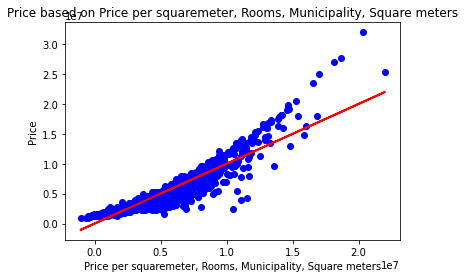

In [16]:
plt.scatter(regresion.predict(listings_df[["Bedrooms", "Square meters", "Price per square meter", "Municipality"]]), listings_df["Price"], color="blue")
plt.plot(regresion.predict(listings_df[["Bedrooms", "Square meters", "Price per square meter", "Municipality"]]), regresion.predict(listings_df[["Bedrooms", "Square meters", "Price per square meter", "Municipality"]]), color="red", scalex=False, scaley=False, linewidth=2)
plt.ylabel("Price")
plt.xlabel("Price per squaremeter, Rooms, Municipality, Square meters")
plt.title("Price based on Price per squaremeter, Rooms, Municipality, Square meters")